## ROIAL hyperparameter list for simulation

* Gaussian Process (GP)
    * `lengthscales`; `signal_variance`, `GP_noise_var`
* Qualitative Feedback
    * Ordinal Feedback
        * `num_category`: number of ordinal category considered
        * `ord_b1` and `ord_delta` is the true ordinal threshold that will be used to generate the ordinal feedback. b1 is the upper limit for the first category. And delta is the increment for each category. i.e. the second category should be in the range of b1 and b1 + delta.
            * `ord_perct`
                * If set to `True`, the true ordinal threshold is determined such that there is $100*n\%$ of the points are in $O_1$ when `ord_b1 = n`
                * If set to `False`, the true ordinal threshold is dertermined such that $b_1 = n * (max - min) + min$ when `ord_b1 = n` with $max$ and $min$ equals to the largest and smallest values of the objective function
        * `ord_nos`: how noisy the simulated feedback is
        * `ordinal_noise`: how noisy the algorithm assumes the feedback is
        * `ordinal_threshold_estimate`: the ordinal threshold algorithm uses
    * Preference Feedback
        * `pref_nos`: how noisy the simulated feedback is
        * `pref_noise`: how noisy algorithm assumes the feedback is

* Action selection
    * `query_type`
        * set to 'IG' during the online learning
        * set to 'post_process' automatically during post-processing to skip evaluating IG
    * `IG_it`: specify the number of samples used to estimate information gain

* Subset Size 
    * `rd_sz`: The number of actions being selected randomly at each iteration
    
* Region of Interest
    * `lambda`: Determines the algorithm’s conservatism in estimating the ROI

* Simulation parameter
    * `num_trials`: specifies the number of queries for each run

    * `run_num`: specifies the number of run (each run use a different synthetic function)

    * `file_part`: the path that store the synthetic functions used for the simulation (Note: it is assumed that the action space has a range between 0-1 for each dimension)

    * `feedback_type`: what qualitative feedback is used
    
    * `D`: dimensionality of the objective function




## Hyperparameter values used in 3D Simulations included in the paper

* `lengthscales`: [0.15,0.15,0.15] 
* `signal_variance`: 1.0
* `GP_noise_var`: 0.01
* `num_category`: 5
* `ordinal_threshold_estimate`: [-0.5, 0.4,0.4,0.4] 
    * in the format of b1, delta t1, deltat2, deltat3
* `ordinal_noise`:0.1
* `pref_noise`:0.02
* `IG_it`: 1000

## GP prior

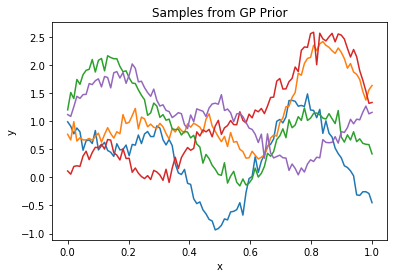

In [3]:
import numpy as np 
from sample_from_GP_prior import sample_GP_prior
# Parameters of kernel and noise. This is assuming a squared exponential kernel in 1D.
variance =0.8        # Amplitude
lengthscale = 0.15     # Wavyness of signal
noise_var = 0.01    # Noise
num_GP_samples = 5 # Number of samples to draw from the prior
sample_points = np.linspace(0, 1, 100) # Specify action space
num_sample_points = len(sample_points) 

# Gaussian process prior mean:
mean = 0.5 * np.ones(num_sample_points) #assume uniform prior 

sample_GP_prior(variance, lengthscale, noise_var, num_GP_samples, sample_points, mean)

## Ordinal noise parameter $c_o$

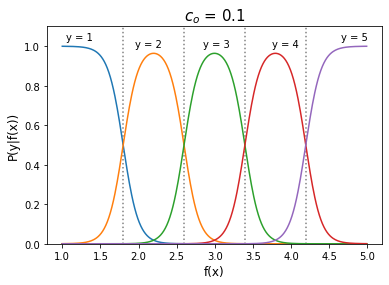

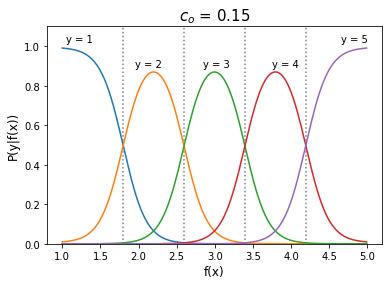

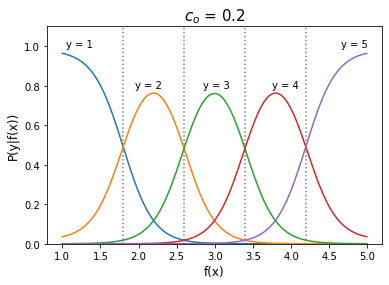

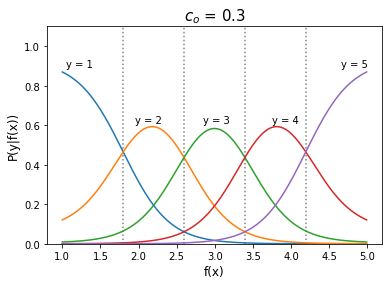

In [1]:
from plot_ordinal_noise import plot_noise_effect
from simulate_feedback import determine_ordinal_threshold

obj_values = np.arange(1,5,0.01) #specify objective function range

#pass number of ordinal category, b1 value, and delta t to the function to determine ordinal threshold
ordinal_threshold = determine_ordinal_threshold(5, 0.2, [0.2,0.2,0.2], obj_values)

c_o = [0.1,0.15,0.2,0.3] #specify the c_o values you want to test
for i in c_o:
    plot_noise_effect(i, ordinal_threshold, obj_values)